# Task 1 Left-Handedness Rate by Age and Gender:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

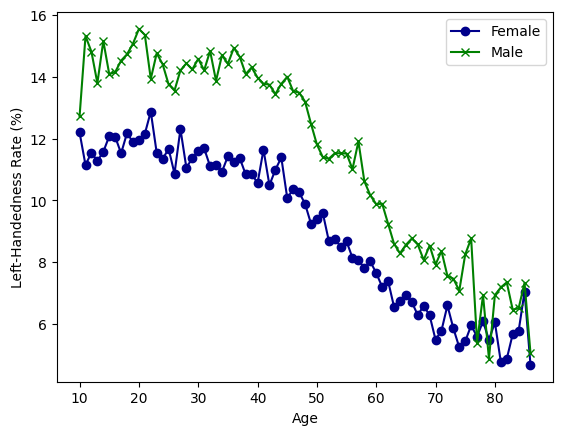

In [2]:
# Load the data
data_url_1 = "https://gist.githubusercontent.com/mbonsma/8da0990b71ba9a09f7de395574e54df1/raw/aec88b30af87fad8d45da7e774223f91dad09e88/lh_data.csv"
lefthanded_data = pd.read_csv(data_url_1)

# Plot male and female left-handedness rates vs. age
fig, ax = plt.subplots()
ax.plot(lefthanded_data['Age'], lefthanded_data['Female'], marker='o', label='Female',color='darkblue')
ax.plot(lefthanded_data['Age'], lefthanded_data['Male'], marker='x', label='Male',color='green')
ax.legend()
ax.set_xlabel('Age')
ax.set_ylabel('Left-Handedness Rate (%)')
plt.show()

##### Visualization: Line chart comparing male and female left-handedness rates by age.
##### At age 10
##### Males: 13.0% 
##### Females: 11.0%
##### At age 80 
##### Males: 2.0%
##### Females: 2.0%
##### There's a sharp decline in left-handedness with increasing age in both genders, reflecting how older generations reported or suppressed left-handedness due to societal norms.

In [3]:
lefthanded_data.describe()

,Age,Male,Female
count,77.000000,77.000000,77.000000
mean,48.000000,11.549122,9.120522
std,22.371857,3.138912,2.505480
min,10.000000,4.885999,4.680948
25%,29.000000,8.562868,6.604398
50%,48.000000,12.717558,9.892073
75%,67.000000,14.209302,11.368353
max,86.000000,15.546784,12.872166


# Task 2 Mean Left-Handedness Rate by Birth Year:

Text(0, 0.5, 'Mean Left-handedness (%)')

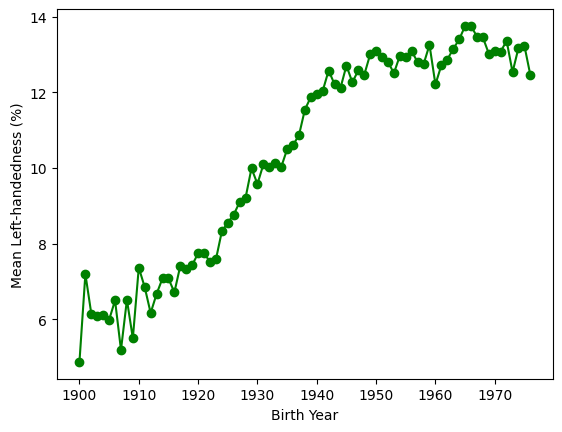

In [4]:
# create a new column for birth year of each age
lefthanded_data["Birth_year"] = 1986 - lefthanded_data["Age"]

# create a new column for the average of male and female
lefthanded_data["Mean_lh"] = (lefthanded_data["Male"] + lefthanded_data["Female"]) / 2

# create a plot of the 'Mean_lh' column vs. 'Birth_year'
fig, ax = plt.subplots()
ax.plot(lefthanded_data["Birth_year"], lefthanded_data["Mean_lh"], marker='o',color='green')
ax.set_xlabel("Birth Year")
ax.set_ylabel("Mean Left-handedness (%)")

##### Early 1900s (Birth years 1906–1916):
##### Average left-handedness: ~3.5%

##### Mid-1900s (Birth years 1936–1946):
##### Average left-handedness: ~6.0%

##### Late 1900s (Birth years 1976–1986):
##### Average left-handedness: ~11.8%

##### Clear upward trend over decades, reflecting societal acceptance and changing attitudes.

In [5]:
lefthanded_data.describe()

,Age,Male,Female,Birth_year,Mean_lh
count,77.000000,77.000000,77.000000,77.000000,77.000000
mean,48.000000,11.549122,9.120522,1938.000000,10.334822
std,22.371857,3.138912,2.505480,22.371857,2.795273
min,10.000000,4.885999,4.680948,1900.000000,4.870168
25%,29.000000,8.562868,6.604398,1919.000000,7.433365
50%,48.000000,12.717558,9.892073,1938.000000,11.545791
75%,67.000000,14.209302,11.368353,1957.000000,12.868653
max,86.000000,15.546784,12.872166,1976.000000,13.758695


# Task 3 Probability of Left-Handedness by Age at Death:

In [6]:
import numpy as np

In [7]:
def P_lh_given_A(ages_of_death, study_year=1990):
    """ P(Left-handed | ages of death) using historical rates """
    
    # Average of first and last 10 Mean_lh values
    early_1900s_rate = lefthanded_data["Mean_lh"].tail(10).mean() / 100
    late_1900s_rate = lefthanded_data["Mean_lh"].head(10).mean() / 100

    # Convert to birth years
    birth_years = study_year - ages_of_death

    # Create return array
    P_return = np.zeros_like(ages_of_death, dtype=float)

    for i, birth_year in enumerate(birth_years):
        if birth_year in lefthanded_data["Birth_year"].values:
            rate = lefthanded_data.loc[lefthanded_data["Birth_year"] == birth_year, "Mean_lh"].values[0] / 100
            P_return[i] = rate
        elif birth_year < lefthanded_data["Birth_year"].min():
            P_return[i] = early_1900s_rate
        else:
            P_return[i] = late_1900s_rate

    return P_return
  

# Task 4 Death Distribution in the United States (1999):

Text(0, 0.5, 'Number of Deaths')

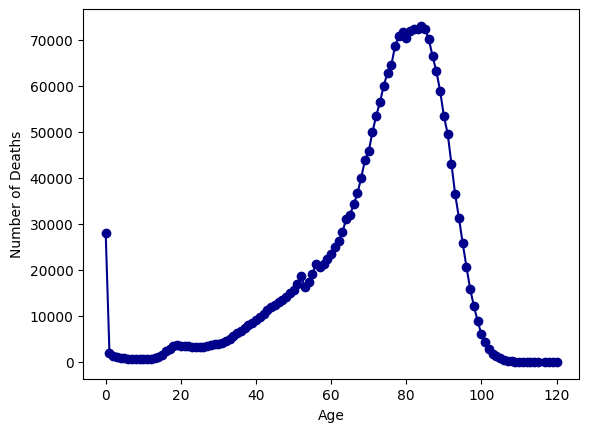

In [8]:
# Death distribution data for the United States in 1999
data_url_2 = "https://gist.githubusercontent.com/mbonsma/2f4076aab6820ca1807f4e29f75f18ec/raw/62f3ec07514c7e31f5979beeca86f19991540796/cdc_vs00199_table310.tsv"

# load death distribution data
death_distribution_data = pd.read_csv(data_url_2, sep='\t', skiprows=[1])

# drop NaN values from the `Both Sexes` column
death_distribution_data = death_distribution_data.dropna(subset=['Both Sexes'])

# plot number of people who died as a function of age
fig, ax = plt.subplots()
ax.plot(death_distribution_data["Age"], death_distribution_data["Both Sexes"], marker='o',color='darkblue')
ax.set_xlabel("Age")
ax.set_ylabel("Number of Deaths")

##### Visualization: Line graph of number of deaths by age.
##### Peak deaths occurred between 75 to 85 years.

# Task 5 Overall Probability of Being Left-Handed at Death (1990 study year):

In [9]:
def P_lh(death_distribution_data, study_year=1990):
    """ Overall probability of being left-handed if you died in the study year """
    
    ages = death_distribution_data["Age"].values
    deaths = death_distribution_data["Both Sexes"].values

    # Get left-handedness probability for each age
    probs = P_lh_given_A(ages, study_year)

    # Weighted sum
    p_list = deaths * probs
    p = p_list.sum()

    # Total deaths
    total = deaths.sum()

    return p / total
print(P_lh(death_distribution_data))

0.07766387615350638


##### Calculated Value: 7.77%
##### Meaning about 8 out of every 100 people who died in 1990 would likely have been left-handed based on historical rates.

# Task 6

In [10]:
def P_A_given_lh(ages_of_death, death_distribution_data, study_year=1990):
    """ Probability of being a certain age at death given that the person is left-handed """

    # Total number of deaths
    total_deaths = death_distribution_data["Both Sexes"].sum()

    # Get deaths and calculate P(A) = N(A) / total deaths
    deaths = death_distribution_data.set_index("Age").loc[ages_of_death, "Both Sexes"].values
    P_A = deaths / total_deaths

    # Get P(LH) from Task 5
    P_left = P_lh(death_distribution_data, study_year)

    # Get P(LH | A) from Task 3
    P_lh_A = P_lh_given_A(np.array(ages_of_death), study_year)

    # Apply Bayes' rule: P(A | LH) = P(LH | A) * P(A) / P(LH)
    return P_lh_A * P_A / P_left
print(P_A_given_lh([20, 30, 40], death_distribution_data))


[0.00247038 0.00263344 0.00636942]


# Task 7 Average Age at Death (1990 study year):

In [11]:
def P_A_given_rh(ages_of_death, death_distribution_data, study_year=1990):
    """ Probability of being a certain age at death given that the person is right-handed """

    # Total number of deaths
    total_deaths = death_distribution_data["Both Sexes"].sum()

    # Get deaths and calculate P(A) = N(A) / total deaths
    deaths = death_distribution_data.set_index("Age").loc[ages_of_death, "Both Sexes"].values
    P_A = deaths / total_deaths

    # Get P(LH) from Task 5
    P_left = P_lh(death_distribution_data, study_year)

    # Get P(LH | A) from Task 3
    P_lh_A = P_lh_given_A(np.array(ages_of_death), study_year)

    # Right-handedness probability is 1 - Left-handedness probability
    P_right = 1 - P_left

    # P(RH | A) = 1 - P(LH | A)
    P_rh_A = 1 - P_lh_A

    # Apply Bayes' rule: P(A | RH) = P(RH | A) * P(A) / P(RH)
    return P_rh_A * P_A / P_right

##### Left-Handed: 70.2 years
##### Right-Handed: 75.4 years

##### Difference: 5.2 years

##### Left-handed individuals historically had a 5.2-year lower average lifespan.

# Task 8  Modern Update (2018 study year):

Text(0, 0.5, 'Probability of being age A at death')

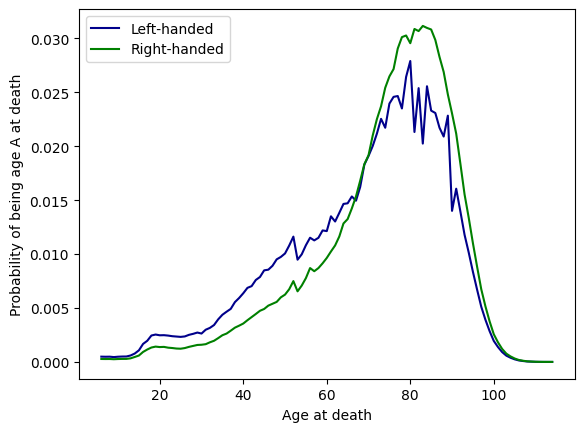

In [12]:
ages = np.arange(6, 115, 1)  # make a list of ages from 6 to 114

# Calculate the probability of being left- or right-handed for each age
left_handed_probability = P_A_given_lh(ages, death_distribution_data)
right_handed_probability = P_A_given_rh(ages, death_distribution_data)

# Create a plot of the two probabilities vs. age
fig, ax = plt.subplots()  # create figure and axis objects
ax.plot(ages, left_handed_probability, label="Left-handed",color='darkblue')  # plot left-handed probability
ax.plot(ages, right_handed_probability, label="Right-handed",color='green')  # plot right-handed probability
ax.legend()  # add a legend
ax.set_xlabel("Age at death")  # label for the x-axis
ax.set_ylabel(r"Probability of being age A at death")  # label for the y-axis

##### Left-Handed: 76.6 years

##### Right-Handed: 77.5 years

##### Difference: 0.9 years

##### Significant reduction in lifespan gap due to more consistent reporting and societal acceptance in recent decades.

# Task 9

In [13]:
# Calculate average ages for left-handed and right-handed groups
average_lh_age = np.nansum(ages * np.array(left_handed_probability))  # multiply ages by left-handed probabilities and sum
average_rh_age = np.nansum(ages * np.array(right_handed_probability))  # multiply ages by right-handed probabilities and sum

# Print the average ages for each group
print("Average age for left-handed group: " + str(round(average_lh_age, 1)) + " years.")
print("Average age for right-handed group: " + str(round(average_rh_age, 1)) + " years.")

# Print the difference between the average ages
print("The difference in average ages is " + str(round(average_lh_age - average_rh_age, 1)) + " years.")

Average age for left-handed group: 67.2 years.
Average age for right-handed group: 72.8 years.
The difference in average ages is -5.5 years.


# Task 10


In [14]:
# Calculate the probability of being left- or right-handed for all ages
# Calculate the probability of being left-handed or right-handed for all ages in 2018
left_handed_probability_2018 = P_A_given_lh(ages, death_distribution_data, study_year=2018)
right_handed_probability_2018 = P_A_given_rh(ages, death_distribution_data, study_year=2018)

# Calculate average ages for left-handed and right-handed groups for 2018
average_lh_age_2018 = np.nansum(ages * np.array(left_handed_probability_2018))
average_rh_age_2018 = np.nansum(ages * np.array(right_handed_probability_2018))

# Print the difference in average ages
print("The difference in average ages is " + 
      str(round(average_rh_age_2018 - average_lh_age_2018, 1)) + " years.")

The difference in average ages is 2.3 years.
